# Importing Datas and Librairies

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pip install tweet-preprocessor

In [4]:
import csv
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.SMILEY, p.OPT.NUMBER)
from collections import Counter
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

In [7]:
df_the_picture_of_dorian_grey_original = pd.read_csv('/content/gdrive/MyDrive/the_picture_of_dorian_grey_ok.csv')
df = df_the_picture_of_dorian_grey_original
print(df.shape)

(753, 2)


## processing the cleaning of all tweets like pseudo, url, emoji...

In [8]:
for i in range(df['tweets'].shape[0]):
  df['tweets'][i] = p.clean(df['tweets'][i])
  df['tweets'][i] = re.sub(r'@[A-Za-z0-9]+','',df['tweets'][i])  
  df['tweets'][i] = df['tweets'][i].replace("_", " ")
  df['tweets'][i] = df['tweets'][i].replace("-", " ")
  df['tweets'][i] = df['tweets'][i].replace("!", "")
  df['tweets'][i] = df['tweets'][i].replace('|', " ")
  df['tweets'][i] = df['tweets'][i].replace('(', " ")
  df['tweets'][i] = df['tweets'][i].replace(')', " ")
  df['tweets'][i] = df['tweets'][i].lower()
  df['tweets'][i] = df['tweets'][i].replace('/', " ")
  df['tweets'][i] = df['tweets'][i].replace('.', " ")
  df['tweets'][i] = df['tweets'][i].replace('?', " ")
  df['tweets'][i] = df['tweets'][i].replace('"', " ")
  df['tweets'][i] = df['tweets'][i].replace('*', " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [9]:
df

,Unnamed: 0,tweets
0,0,rt : i want new moots im cool with anyone boo...
1,1,rt : i want new moots im cool with anyone boo...
2,2,"rt : pandro s berman, aged , us filmmaker b..."
3,3,the picture of dorian gray
4,4,rt : i want new moots im cool with anyone boo...
...,...,...
748,748,so my copy of the picture of dorian gray had a...
749,749,rt : ten great lines from novels the curves o...
750,750,crush just called the picture of dorian gray m...
751,751,she looks like the picture of dorian gray


# Making big string and list of word

In [10]:
all_words = ''
for i in range(df['tweets'].shape[0]):
  all_words = all_words + df['tweets'][i]

In [11]:
list_words = all_words.split(' ')

# Removing the Stop Words and some common and useless words for sentiment analysis

In [12]:
# showing bigger occurencies
word_counts = Counter(list_words)
for w in word_counts.most_common(9):
    print(f"{w[0]}:  \t{w[1]} ")

:  	1752 
the:  	1363 
of:  	1130 
dorian:  	714 
picture:  	610 
gray:  	488 
i:  	392 
::  	383 
to:  	346 


In [20]:
# Cleaning
list_words_without_stopword = [ word for word in list_words if word not in list(WordCloud().stopwords) ]
my_stopwords = ['the', 'picture', 'of', 'dorian','gray','i','to,', 'oscar', '1945', 'portrait', 'version' , 'original' , 'book']
list_words__without_stopword_final = [ word for word in list_words_without_stopword if word not in my_stopwords ]                                                      

In [21]:
# Verification
word_counts = Counter(list_words__without_stopword_final)
for w in word_counts.most_common(9):
    print(f"{w[0]}:  \t{w[1]} ")


:  	1752 
::  	383 
gray's:  	90 
canvas:  	89 
final:  	89 
corrupted,:  	89 
wilde,:  	86 
nothing:  	82 
great:  	79 


In [22]:
all_words = " ".join([tweets for tweets in list_words__without_stopword_final])

# Wordcloud

In [23]:
wordcloud = WordCloud(
    background_color = 'white', width=300, height=200, random_state= 55, max_font_size=300 , max_words= 100
    ).generate(all_words)

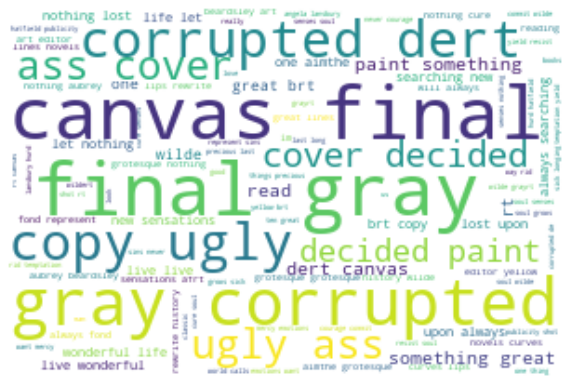

In [25]:
plt.figure(figsize = (10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# bigrammes

In [26]:
# Tokenize
tokens = WordPunctTokenizer().tokenize(all_words)
bigrams = [w for w in  ngrams(tokens,n=2)]
print(bigrams)

[('rt', ':'), (':', 'want'), ('want', 'new'), ('new', 'moots'), ('moots', 'im'), ('im', 'cool'), ('cool', 'anyone'), ('anyone', 'booktwt'), ('booktwt', ','), (',', 'filmtwt'), ('filmtwt', ','), (',', 'arttwt'), ('arttwt', ','), (',', 'studytwt'), ('studytwt', ','), (',', 'etc'), ('etc', '+'), ('+', 'nice'), ('nice', 'yeah'), ('yeah', 'follow'), ('follow', 'mert'), ('mert', ':'), (':', 'want'), ('want', 'new'), ('new', 'moots'), ('moots', 'im'), ('im', 'cool'), ('cool', 'anyone'), ('anyone', 'booktwt'), ('booktwt', ','), (',', 'filmtwt'), ('filmtwt', ','), (',', 'arttwt'), ('arttwt', ','), (',', 'studytwt'), ('studytwt', ','), (',', 'etc'), ('etc', '+'), ('+', 'nice'), ('nice', 'yeah'), ('yeah', 'follow'), ('follow', 'mert'), ('mert', ':'), (':', 'pandro'), ('pandro', 's'), ('s', 'berman'), ('berman', ','), (',', 'aged'), ('aged', ','), (',', 'us'), ('us', 'filmmaker'), ('filmmaker', 'b'), ('b', 'three'), ('three', 'musketeers'), ('musketeers', 'brithe'), ('brithe', 'rt'), ('rt', ':'), 

# trigrammes

In [27]:
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['rt_:_want', ':_want_new', 'want_new_moots', 'new_moots_im', 'moots_im_cool', 'im_cool_anyone', 'cool_anyone_booktwt', 'anyone_booktwt_,', 'booktwt_,_filmtwt', ',_filmtwt_,', 'filmtwt_,_arttwt', ',_arttwt_,', 'arttwt_,_studytwt', ',_studytwt_,', 'studytwt_,_etc', ',_etc_+', 'etc_+_nice', '+_nice_yeah', 'nice_yeah_follow', 'yeah_follow_mert', 'follow_mert_:', 'mert_:_want', ':_want_new', 'want_new_moots', 'new_moots_im', 'moots_im_cool', 'im_cool_anyone', 'cool_anyone_booktwt', 'anyone_booktwt_,', 'booktwt_,_filmtwt', ',_filmtwt_,', 'filmtwt_,_arttwt', ',_arttwt_,', 'arttwt_,_studytwt', ',_studytwt_,', 'studytwt_,_etc', ',_etc_+', 'etc_+_nice', '+_nice_yeah', 'nice_yeah_follow', 'yeah_follow_mert', 'follow_mert_:', 'mert_:_pandro', ':_pandro_s', 'pandro_s_berman', 's_berman_,', 'berman_,_aged', ',_aged_,', 'aged_,_us', ',_us_filmmaker', 'us_filmmaker_b', 'filmmaker_b_three', 'b_three_musketeers', 'three_musketeers_brithe', 'musketeers_brithe_rt', 'brithe_rt_:', 'rt_:_want', ':_want_new